In [2]:
import numpy as np
from datetime import datetime
import pydicom
from pydicom.dataset import FileMetaDataset, Dataset

In [6]:
def npy_to_dcm(npy_array, output_dcm_path, patient_name="Anonymous", study_description="MRI Study"):
    # DICOM 데이터셋 생성
    ds = Dataset()

    # DICOM 메타데이터 설정
    meta = FileMetaDataset()
    meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
    ds.file_meta = meta

    # 필수 필드 설정
    # need for make pdf
    ds.PatientName = "Hong Gildong"
    ds.PatientID = "123456"  
    ds.PatientSex = "M"  
    ds.PatientAge = "30"  
    ds.PatientBirthDate = datetime.strptime("19940101", "%Y%m%d").date() 
    
    ds.StudyDescription = study_description
    ds.Rows, ds.Columns = npy_array.shape[1:]
    ds.NumberOfFrames = npy_array.shape[0]
    ds.ImagePositionPatient = [0.0, 0.0, 0.0]  # Assuming slices along the z-axis
    ds.ImageOrientationPatient = [1.0, 0.0, 0.0, 0.0, 1.0, 0.0]
    ds.BitsAllocated = 16
    ds.BitsStored = 16
    ds.HighBit = 15
    ds.PixelRepresentation = 1
    ds.SamplesPerPixel = 1
    ds.PhotometricInterpretation = "MONOCHROME2"

    ds.PlanarConfiguration = 1  # 0 또는 1 중 선택
    
    # Series-specific information
    ds.SeriesDescription = "44 Channel MRI Series"
    ds.Modality = "MR"

    # 이미지 데이터 설정
    ds.PixelData = npy_array.astype(np.uint16).tobytes()

    # 저장
    ds.save_as(output_dcm_path)
    print(f"Conversion complete. DICOM file saved at: {output_dcm_path}")


In [7]:
raw_path = "C:/Users/zeroone/Downloads/raw_dataset/train/axial/0000.npy"
raw_np_img = np.load(raw_path)

# 예시: .dcm 파일로 변환 및 저장
output_dcm_path = "output_dicom.dcm"
npy_to_dcm(raw_np_img, output_dcm_path)

Conversion complete. DICOM file saved at: output_dicom.dcm


c:\Users\zeroone\Documents\projects\final_demo\.venv\lib\site-packages\pydicom\valuerep.py:443: UserWarning: Invalid value for VR AS: '30'.
  warnings.warn(msg)


In [9]:
import pydicom

def read_dicom_info(dicom_file_path):
    ds = pydicom.dcmread(dicom_file_path, force=True)
    
    print("DICOM Information:")
    print(f"Patient Name: {ds.PatientName}")
    print(f"Patient ID: {ds.PatientID}")
    print(f"Patient Age: {ds.PatientAge}")
    print(f"Patient Sex: {ds.PatientSex}")
    print(f"Patient Birth Date: {ds.PatientBirthDate}")
    
    # 필요한 다른 속성들을 추가로 출력할 수 있습니다.

# 예시: .dcm 파일 읽기
dicom_file_path = "output_dicom.dcm"  # 변환된 DICOM 파일의 경로로 수정
read_dicom_info(dicom_file_path)

DICOM Information:
Patient Name: Hong Gildong
Patient ID: 123456
Patient Age: 30
Patient Sex: M
Patient Birth Date: 19940101


In [12]:
def dicom_to_numpy(dicom_file_path):
    # DICOM 파일 읽기
    ds = pydicom.dcmread(dicom_file_path, force=True)

    # DICOM 데이터를 NumPy 배열로 변환
    numpy_array = ds.pixel_array.astype(np.uint8)

    return numpy_array

In [13]:
dicom_file_path = "output_dicom.dcm"

# DICOM 파일을 NumPy 배열로 변환
numpy_data = dicom_to_numpy(dicom_file_path)

# NumPy 배열 사용 예시
print("NumPy Array Shape:", numpy_data.shape)
print("NumPy Array Data Type:", numpy_data.dtype)
np.save("restored_np_img.npy", numpy_data)

NumPy Array Shape: (44, 256, 256)
NumPy Array Data Type: uint8


In [ ]:
import matplotlib.pyplot as plt

for i in range(3):
    plt.imshow(numpy_data[i], cmap="gray")
    plt.title(f"Slice {i}")
    plt.axis("off")
    plt.show()

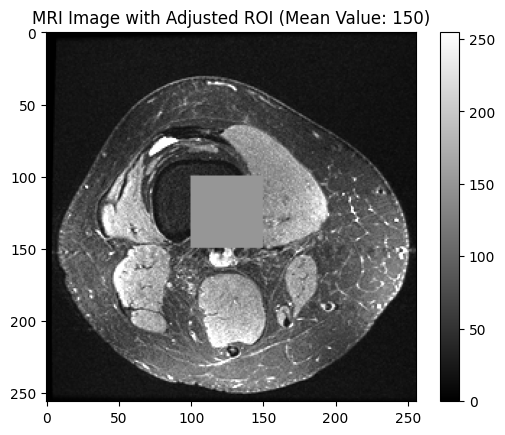

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 가상의 MRI 이미지 생성
raw_path = "C:/Users/zeroone/Downloads/raw_dataset/train/axial/0000.npy"
mri_image = np.load(raw_path)
mri_image = mri_image[0]

# ROI 생성 (가운데 부분을 예로 들었습니다)
roi = np.zeros_like(mri_image)
roi[100:150, 100:150] = 1

# ROI에 해당하는 값만 선택하여 평균 계산
roi_values = mri_image[roi == 1]
mean_roi_value = np.mean(roi_values)

# ROI 값 조정
adjusted_mean_value = 150  # 조정하고자 하는 값으로 변경 (임의의 값)
mri_image[roi == 1] = adjusted_mean_value

# 시각화
plt.imshow(mri_image, cmap='gray')
plt.title(f'MRI Image with Adjusted ROI (Mean Value: {adjusted_mean_value})')
plt.colorbar()
plt.show()